In [385]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

In [422]:
#Loading in the data
data = pd.read_csv(r"C:\Users\ljeffery\Documents\IandD\Kaggle\Untitled Folder\Churn.csv")

In [423]:
#Checking a sample from the dataframe
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6358,1027-LKKQQ,Female,0,Yes,Yes,72,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),80.45,5886.85,No
4387,5868-YTYKS,Male,0,No,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.25,20.25,No
2892,2668-TZSPS,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3416,0603-OLQDC,Male,0,No,Yes,12,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,69.85,837.5,No
2293,9339-FIIJL,Male,0,Yes,No,72,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),85.95,6151.9,No


In [424]:
data.shape

(7043, 21)

In [425]:
#having a look at the data types and number of enteries
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

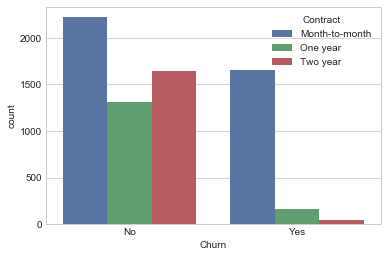

In [426]:
#plotting count of Churn and Contract type
plt1 = sns.countplot(x = 'Churn',  data = data, hue = 'Contract', palette= 'deep')

The most common contract to churn is the Month-to-Month contract. 

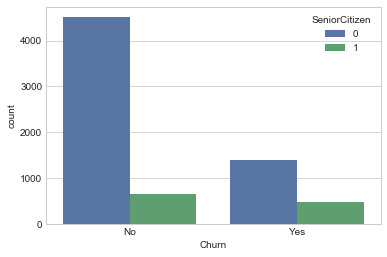

In [427]:
#plotting count of Churn and Age group
plt2 = sns.countplot(x = 'Churn',  data = data, hue = 'SeniorCitizen', palette= 'deep')

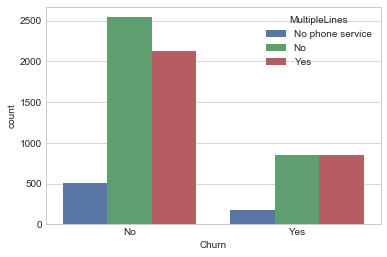

In [428]:
#plotting count of Churn and Number of lines
plt2 = sns.countplot(x = 'Churn',  data = data, hue = 'MultipleLines', palette= 'deep')

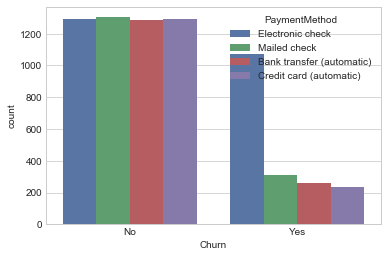

In [429]:
#plotting count of Churn and Method of Payment
sns.countplot(x = 'Churn',  data = data, hue = 'PaymentMethod', palette= 'deep')

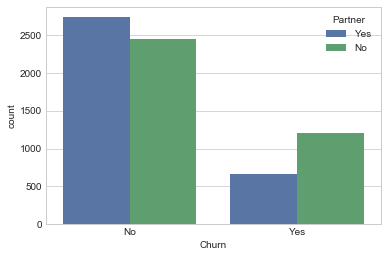

In [430]:
sns.countplot(x = 'Churn',  data = data, hue = 'Partner', palette= 'deep')

#### Data Engineering 

In [431]:
#changing TotalCharges to numeric 
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [432]:
#One hot encode for features with Yes/No
def encoder(status):
        if status == 'Yes':
            return 1
        else:
            return 0
        
LabelList = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','OnlineSecurity',
 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn' ]

for i in LabelList:
    Col = i + '_label'
    data[Col] = data[i].apply(encoder)


In [433]:
# #Encoding code levels for features with more than yes or no 
CodeList = ['InternetService', 'Contract', 'PaymentMethod']

for i in CodeList:
    data = pd.concat([data, pd.get_dummies(data[i])], axis = 1)

data['No_internet'] = data['No']
data.drop('No', axis = 1, inplace = True)

In [435]:
#Dropping columns
data.drop(LabelList, axis = 1, inplace = True)
data.drop(CodeList, axis = 1, inplace = True)
data.drop('customerID', axis = 1, inplace = True)

In [341]:
data.sample(10)

,tenure,MonthlyCharges,TotalCharges,gender_label,SeniorCitizen_label,Partner_label,Dependents_label,PhoneService_label,MultipleLines_label,OnlineSecurity_label,...,DSL,Fiber optic,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,No_internet
721,61,20.55,1305.95,0,0,1,1,1,0,0,...,0,0,0,0,1,0,1,0,0,1
3154,4,72.75,317.75,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0
3733,25,35.05,844.45,0,0,0,1,0,0,1,...,1,0,0,0,1,1,0,0,0,0
4466,4,79.90,324.30,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0
5875,65,71.00,4386.20,0,0,1,0,1,0,1,...,1,0,0,0,1,1,0,0,0,0
1258,47,20.15,1046.20,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1
6650,6,20.20,123.65,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,1
241,72,109.20,7878.30,0,0,0,0,1,1,0,...,0,1,0,0,1,1,0,0,0,0
6716,3,74.10,228.00,0,0,1,0,1,1,0,...,0,1,1,0,0,0,1,0,0,0
91,1,74.70,74.70,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0


In [436]:
#Checking for Null values
print(data.isnull().sum())

tenure                        0
MonthlyCharges                0
TotalCharges                 11
gender_label                  0
SeniorCitizen_label           0
Partner_label                 0
Dependents_label              0
PhoneService_label            0
MultipleLines_label           0
OnlineSecurity_label          0
OnlineBackup_label            0
DeviceProtection_label        0
TechSupport_label             0
StreamingTV_label             0
StreamingMovies_label         0
PaperlessBilling_label        0
Churn_label                   0
DSL                           0
Fiber optic                   0
Month-to-month                0
One year                      0
Two year                      0
Bank transfer (automatic)     0
Credit card (automatic)       0
Electronic check              0
Mailed check                  0
No_internet                   0
dtype: int64


In [437]:
data['Charges'] = data['tenure'] * data['MonthlyCharges']
data['TotalCharges'].fillna(data['Charges'], inplace=True)

#### ML

In [438]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, GenericUnivariateSelect
from sklearn.cross_validation import train_test_split
#features = x labels = y

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

from sklearn.model_selection import GridSearchCV   
from sklearn.metrics import accuracy_score, classification_report
from pprint import pprint 

In [439]:
X = data.drop(['Churn_label','MonthlyCharges', 'Charges'], axis=1)
y = data['Churn_label']

In [440]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [441]:
##Grid Search for Logistic Regression
LR = LogisticRegression()
parameters = {'tol': [1, 0.1, 0.01, 0.001, 0.0001], 
              'C': [0.1, 0.01, 0.001, 0.0001]}
clf_lr = GridSearchCV(LR, parameters, verbose = 1)
print("\nPerforming grid search for Logistic Regression")
print("parameters:")
pprint(parameters)
clf_lr.fit(X_train, y_train)
print("\nBest score: {:0.3f}".format(clf_lr.best_score_))
pred = clf_lr.predict(X_test)
accuracy = accuracy_score(pred,y_test)
print ("\nAccuracy Score:", accuracy)
print (classification_report(y_test,pred))
print("\nBest parameters set:")
best_parameters = clf_lr.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t{}: {}".format(param_name, best_parameters[param_name]))


Performing grid search for Logistic Regression
parameters:
{'C': [0.1, 0.01, 0.001, 0.0001], 'tol': [1, 0.1, 0.01, 0.001, 0.0001]}
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best score: 0.805

Accuracy Score: 0.8144817794604827
             precision    recall  f1-score   support

          0       0.85      0.91      0.88      1539
          1       0.69      0.57      0.62       574

avg / total       0.81      0.81      0.81      2113


Best parameters set:
	C: 0.1
	tol: 0.0001


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.8s finished


In [476]:
from sklearn.feature_selection import RFE
LR = LogisticRegression()
selector_rfe= RFE(LR, step=1)
rfe_fit = selector_rfe.fit(X, y)
print(rfe_fit.support_)
print(rfe_fit.ranking_)
X_new = rfe_fit.transform(X)

rank=list(rfe_fit.ranking_)
support = list(rfe_fit.support_)
col_nm=list(X.columns)
dict_rank={'Column_Name': col_nm,'Ranking':rank, 'Support': support}
df_rank=pd.DataFrame(dict_rank)
df_rank.sort_values('Ranking')

[False False False False False False  True False  True  True False  True
 False False  True False  True  True  True  True  True  True False False
  True]
[ 9 12 14 13 10  3  1  8  1  1 11  1  5  6  1  4  1  1  1  1  1  1  7  2
  1]


,Column_Name,Ranking,Support
24,No_internet,1,True
21,Credit card (automatic),1,True
20,Bank transfer (automatic),1,True
19,Two year,1,True
18,One year,1,True
6,PhoneService_label,1,True
17,Month-to-month,1,True
8,OnlineSecurity_label,1,True
9,OnlineBackup_label,1,True
16,Fiber optic,1,True


In [477]:
#LR model with selected features
X_lr = X_new
y_lr = data['Churn_label']

X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size=0.3, random_state=42)

LR = LogisticRegression()
parameters = {'tol': [1, 0.1, 0.01, 0.001, 0.0001], 
              'C': [0.1, 0.01, 0.001, 0.0001]}
clf_lr = GridSearchCV(LR, parameters, verbose = 1)
print("\nPerforming grid search for Logistic Regression")
print("parameters:")
pprint(parameters)
clf_lr.fit(X_train, y_train)
print("\nBest score: {:0.3f}".format(clf_lr.best_score_))
pred = clf_lr.predict(X_test)
accuracy = accuracy_score(pred,y_test)
print ("\nAccuracy Score:", accuracy)
print (classification_report(y_test,pred))
print("\nBest parameters set:")
best_parameters = clf_lr.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t{}: {}".format(param_name, best_parameters[param_name]))


Performing grid search for Logistic Regression
parameters:
{'C': [0.1, 0.01, 0.001, 0.0001], 'tol': [1, 0.1, 0.01, 0.001, 0.0001]}
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best score: 0.788

Accuracy Score: 0.7917652626597255
             precision    recall  f1-score   support

          0       0.84      0.89      0.86      1539
          1       0.64      0.54      0.58       574

avg / total       0.78      0.79      0.79      2113


Best parameters set:
	C: 0.1
	tol: 0.1


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished


In [359]:
##Grid Search for Decision Tree Classifier
DTC = DecisionTreeClassifier()
parameters = {'criterion' : ('gini', 'entropy'), 
              'min_samples_split' : [2,3,4,5,6]}
clf_dtc = GridSearchCV(DTC, parameters, verbose = 1)
print("\nPerforming grid search for Decision Tree Classifier")
print("parameters:")
pprint(parameters)
clf_dtc.fit(X_train, y_train)
print("\nBest score: {:0.3f}".format(clf_dtc.best_score_))
pred = clf_dtc.predict(X_test)
accuracy = accuracy_score(pred,y_test)
print ("\nAccuracy Score:", accuracy)
print (classification_report(y_test,pred))
print("\nBest parameters set:")
best_parameters = clf_dtc.best_estimator_.get_params()LR = LogisticRegression()
selector_rfe= RFECV(LR, step=1, cv = 3)
rfe_fit = selector_rfe.fit(X, y)
print(rfe_fit.support_)
print(rfe_fit.ranking_)

rank=list(rfe_fit.ranking_)
support = list(rfe_fit.support_)
col_nm=list(X.columns)
dict_rank={'Column_Name': col_nm,'Ranking':rank, 'Support': support}
df_rank=pd.DataFrame(dict_rank)
df_rank.sort_values('Ranking')
for param_name in sorted(parameters.keys()):
    print("\t{}: {}".format(param_name, best_parameters[param_name]))


Performing grid search for Decision Tree Classifier
parameters:
{'criterion': ('gini', 'entropy'), 'min_samples_split': [2, 3, 4, 5, 6]}
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best score: 0.736

Accuracy Score: 0.751538097491718
             precision    recall  f1-score   support

          0       0.82      0.84      0.83      1539
          1       0.55      0.51      0.53       574

avg / total       0.75      0.75      0.75      2113


Best parameters set:
	criterion: gini
	min_samples_split: 5


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.6s finished


In [472]:
DTC = DecisionTreeClassifier()
selector_rfe= RFECV(DTC, step=1, cv = 3)
rfe_fit = selector_rfe.fit(X, y)
print(rfe_fit.support_)
print(rfe_fit.ranking_)

rank=list(rfe_fit.ranking_)
support = list(rfe_fit.support_)
col_nm=list(X.columns)
dict_rank={'Column_Name': col_nm,'Ranking':rank, 'Support': support}
df_rank=pd.DataFrame(dict_rank)
df_rank.sort_values('Ranking')

[ True  True False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False False  True  True  True  True
 False]
[1 1 5 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 1 1 1 1 6]


,Column_Name,Ranking,Support
0,tenure,1,True
22,Electronic check,1,True
21,Credit card (automatic),1,True
20,Bank transfer (automatic),1,True
17,Month-to-month,1,True
16,Fiber optic,1,True
15,DSL,1,True
14,PaperlessBilling_label,1,True
13,StreamingMovies_label,1,True
23,Mailed check,1,True


In [347]:
# selector_chi = SelectKBest(chi2, k ='all')
# selector_chi.fit(X, y)
# # for n,s in zip(X, selector_chi.scores_):
# #     print('Chi-score: %3.2ft for feature %s'% (s,n))
# scores = zip(X, selector_chi.scores_)
# sorted_list = sorted(scores, key=lambda x: x[1], reverse=True)
# print ('SelectKBest scores: ', sorted_list)



SelectKBest scores:  [('TotalCharges', 624292.0030037116), ('tenure', 16278.92368544716), ('gender_label', nan), ('SeniorCitizen_label', nan), ('Month-to-month', 519.8953106092886), ('Two year', 488.578090256898), ('Electronic check', 426.4227672392341), ('Fiber optic', 374.4762164498734), ('No_internet', 286.5201929657208), ('One year', 176.12317121760617), ('OnlineSecurity_label', 147.29585790556192), ('TechSupport_label', 135.55978268636352), ('Dependents_label', 133.03644287868082), ('PaperlessBilling_label', 105.68086299962546), ('Credit card (automatic)', 99.58205743560961), ('Partner_label', 82.41208263843043), ('Bank transfer (automatic)', 76.48591316210307), ('DSL', 71.31318025219977), ('Mailed check', 45.651589644453324), ('OnlineBackup_label', 31.217694023039066), ('DeviceProtection_label', 20.226662195984314), ('StreamingTV_label', 17.334234804462824), ('StreamingMovies_label', 16.242530716789197), ('MultipleLines_label', 6.548511590728465), ('PhoneService_label', 0.0972606

In [363]:
# best_features = [(i[0]) for i in sorted_list[0:10]]
# print(best_features)

['gender_label', 'SeniorCitizen_label', 'Month-to-month', 'tenure', 'Fiber optic', 'Two year', 'Electronic check', 'No_internet', 'TotalCharges', 'PaperlessBilling_label']


In [360]:
# selector_f = SelectKBest(f_classif, k ='all')
# selector_f.fit(X, y)
# scores = zip(X, selector_f.scores_)
# sorted_list = sorted(scores, key=lambda x: x[1], reverse=True)
# print ('SelectKBest scores: ', sorted_list)

# # selector_f = SelectKBest(f_classif, k ='all')
# # selector_f.fit(X, y)

# # for n,s in zip(X, selector_f.scores_):
# #     print('F-score: %3.2ft for feature %s'% (s,n))

SelectKBest scores:  [('gender_label', nan), ('SeniorCitizen_label', nan), ('Month-to-month', 1382.340696976842), ('tenure', 997.2680104991426), ('Fiber optic', 738.0460424544476), ('Two year', 707.9192540580779), ('Electronic check', 706.1950282817295), ('No_internet', 385.6985884848515), ('TotalCharges', 288.2789610222167), ('PaperlessBilling_label', 268.9852180928093), ('One year', 229.90574088120178), ('OnlineSecurity_label', 212.66619940319887), ('TechSupport_label', 196.25540507248175), ('Dependents_label', 195.1493137732415), ('Partner_label', 163.06003598399556), ('Credit card (automatic)', 129.33097463289684), ('DSL', 110.33853175234901), ('Bank transfer (automatic)', 99.31506049593521), ('Mailed check', 59.68654545516675), ('OnlineBackup_label', 47.96295545820452), ('DeviceProtection_label', 30.954780439130214), ('StreamingTV_label', 28.261123665052395), ('StreamingMovies_label', 26.628665202834036), ('MultipleLines_label', 11.341439011576513), ('PhoneService_label', 1.004266

C:\Users\ljeffery\AppData\Local\conda\conda\envs\Python 3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [2 3] are constant.
  UserWarning)
C:\Users\ljeffery\AppData\Local\conda\conda\envs\Python 3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw



Performing grid search for Logistic Regression
parameters:
{'C': [0.1, 0.01, 0.001, 0.0001], 'tol': [1, 0.1, 0.01, 0.001, 0.0001]}
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best score: 0.797

Accuracy Score: 0.804070042593469
             precision    recall  f1-score   support

          0       0.84      0.91      0.87      1539
          1       0.68      0.53      0.59       574

avg / total       0.79      0.80      0.80      2113


Best parameters set:
	C: 0.1
	tol: 0.0001


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished
